In [1]:
import os,sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
indir = os.path.join('G:\Shared drives\BTO Topic 2  Integrating EE & DR\Task 2\Reports, papers, and draft deliverables\FY20 Q4 briefing\Consolidated_figures\Level_2_data')
outdir = os.path.join('G:\Shared drives\BTO Topic 2  Integrating EE & DR\Task 2\Reports, papers, and draft deliverables\FY20 Q4 briefing\Consolidated_figures')
os.listdir(indir)

['Level2_Shed_CAMX.csv',
 'Level2_Shed_NENG.csv',
 'Level2_Shed_ERCT.csv',
 'Level2_Shift_ERCT.csv',
 'Level2_Shift_CAMX.csv',
 'Level2_Shift_NENG.csv',
 'Prog_design_data',
 'Tech_potential_data']

In [206]:
include_all = True #Whether or not to include All Measures

region_mapping = {'CAMX':'California',
                  'ERCT':'Texas',
                  'NENG':'New England'}
color_mapping = {'California':'#003262',
                 'Texas':'#bf5700',
                 #'New England':'#881c1c'}
                 'New England':'#007155'}

symbol_mapping_state = {'California':'<',
                        'Texas':(5,1,0),
                        'New England':'H'}

color_mapping_scen = {'equipment':'darkcyan',#'mediumspringgreen',
                      'controls':'firebrick',#'steelblue',
                      'envelope':'mediumblue',#'salmon',
                      'cont+env':'darkviolet',#'mediumpurple',
                      'all':'dimgray'
                     }
symbol_mapping = {'equipment':'d',#'s',
                  'controls':'d',#'o',
                  'envelope':'d',#'p',
                  'cont+env':'d',#'P',
                  'all':'d',#(7,1,0)
                  }
colname_mapping = {'Extreme Ramp': 'Extreme Ramping Need',
                   'Peak Demand': 'System Peak Demand'}

metric_names = {'System Peak Demand':'(Shed)', 
                'System Peakiness':'(Shed)', 
                'Routine Ramping Need':'(Shift)', 
                'Extreme Ramping Need':'(Shift)',
                }

#Validate consistency of column and metric names
for n in colname_mapping.values():
    assert n in metric_names.keys()

In [165]:
sns.set()
sns.set_context('talk')

In [166]:
data=pd.read_csv(os.path.join(indir,'Tech_potential_data','Tech_potential_{t}_{r}_20.csv'.format(t='Shed', r='CAMX')), 
                         index_col=0)
data.div(100.).T['Technical Potential']

equipment   -0.311012
controls     0.143326
envelope    -0.347745
cont_env    -0.142629
all         -0.453557
Name: Technical Potential, dtype: float64

In [167]:
plot_data=None

for region in region_mapping.keys():   
    data_r = pd.DataFrame()
    for drtype in ['Shed', 'Shift']:
        data=pd.read_csv(os.path.join(indir,'Level2_{t}_{r}.csv').format(t=drtype, r=region), 
                         index_col=0)
        data=data.rename(columns={'cont_env': 'cont+env'})
        data_r[data.T.columns]=data.div(100.).T
        for price in ['20','600']:
            data=pd.read_csv(os.path.join(indir,'Tech_potential_data',
                                          'Tech_potential_{t}_{r}_{c}.csv'.format(t=drtype, r=region, c=price)), 
                             index_col=0)
            data=data.rename(columns={'cont_env': 'cont+env'})
            name = 'Low-cost' if price=='20' else 'High-cost'
            data_r['{c} {t} Potential'.format(c=name, t=drtype)] = data.div(100.).T['Technical Potential']
    
   # data2=pd.read_csv(os.path.join(indir,'Level2_Shift_{r}.csv').format(r=region), 
   #                  index_col=0)
   # data2=data2.rename(columns={'cont_env': 'cont+env'})
   # data[data2.T.columns] = data2.T.div(100.)
    data = pd.read_csv(os.path.join(indir, 'Prog_design_data', 'Shed_shift_{r}.csv'.format(r=region)), 
                       index_col=0)
    
    data=data.rename(columns={'cont_env': 'cont+env'})
    data_r[data.T.columns] = data.div(100).T
    data_r = data_r.reset_index().rename(columns={'index':'EE portfolio'})
    
    
    #data2=pd.read_csv(os.path.join(indir,'Tech_potential_data','Tech_potential_Shed_{r}_20'))
    data_r['Region'] = region_mapping[region]
    if plot_data is None:
        plot_data=data_r
    else:
        plot_data=plot_data.append(data_r)

plot_data=plot_data.rename(columns=colname_mapping)

plot_data

EE portfolio  System Peak Demand  Benchmark Shed Potential  \
0    equipment           -0.123875                 -0.241464   
1     controls            0.009466                  0.033163   
2     envelope           -0.044632                 -0.260842   
3     cont+env           -0.033481                 -0.187523   
4          all           -0.152130                 -0.451264   
0    equipment           -0.141652                 -0.396579   
1     controls           -0.004259                  0.018925   
2     envelope           -0.113321                 -0.356728   
3     cont+env           -0.114159                 -0.313807   
4          all           -0.211714                 -0.594482   
0    equipment           -0.062357                 -0.109215   
1     controls           -0.004261                 -0.023790   
2     envelope           -0.051757                 -0.187613   
3     cont+env           -0.054122                 -0.195204   
4          all           -0.125707                 -0.360549   

   System Peakiness  Low-cost Shed Potential  High-cost Shed Potential  \
0         -0.124377                -0.311012                 -0.223410   
1          0.075546                 0.143326                  0.030697   
2         -0.074196                -0.347745                 -0.236603   
3          0.017189                -0.142629                 -0.169575   
4         -0.117009                -0.453557                 -0.405422   
0         -0.005813                -0.415159                 -0.402869   
1         -0.044686                 0.019419                  0.021901   
2         -0.128746                -0.359211                 -0.329852   
3         -0.182003                -0.314313                 -0.288941   
4         -0.116623                -0.595657                 -0.586741   
0          0.070806                -0.124786                 -0.158231   
1         -0.009686                -0.015549                 -0.020833   
2         -0.034288                -0.215187                 -0.168814   
3         -0.054805                -0.190812                 -0.174266   
4         -0.023339                -0.365227                 -0.381942   

   Extreme Ramping Need  Benchmark Shift Potential  Routine Ramping Need  \
0              0.101306                  -0.330214             -0.186171   
1             -0.218492                  -0.025959              0.040790   
2             -0.015240                  -0.093999              0.012904   
3             -0.260232                  -0.162058              0.044527   
4             -0.018756                  -0.393961             -0.158617   
0              0.144674                  -0.402683             -0.182538   
1              0.736387                   0.200722              0.324634   
2             -0.013329                  -0.260415             -0.151346   
3              0.411849                  -0.093926              0.096699   
4              0.181033                  -0.464355             -0.194595   
0              0.458729                  -0.190175             -0.241715   
1              0.083918                   0.109758              0.180516   
2              0.044905                  -0.195798             -0.084789   
3              0.231076                  -0.081134              0.093761   
4              0.141493                  -0.298523             -0.160191   

   Low-cost Shift Potential  High-cost Shift Potential  Shed Season Duration  \
0                 -0.922679                  -0.371526             -0.103448   
1                  0.867081                  -0.027488              0.000000   
2                 -0.311873                  -0.050476             -0.103448   
3                  0.456778                  -0.101576              0.017241   
4                 -0.466549                  -0.439681             -0.103448   
0                 -0.559544                  -0.444527              0.954545   
1              

In [168]:
noall = ''
if not include_all:
    noall = '_noall'
    plot_data = plot_data.loc[plot_data['EE portfolio']!='all']
    
noall

''

In [169]:
def plot_metric_scatter(plot_data, x='Extreme Ramping Need', y='Benchmark Shift Potential', save=True):
    fig,ax = plt.subplots(figsize=[10,10])
    sns.scatterplot(data=plot_data, x=x, y=y, 
                    hue='EE portfolio', style='Region', s=350, 
                    palette=color_mapping_scen, markers=symbol_mapping_state,
                    ax=ax)
    axmin = min([np.floor(10*min(plot_data[x]))/10,
                 np.floor(10*min(plot_data[y]))/10])
    axmax = max([ np.ceil(10*max(plot_data[x]))/10,
                  np.ceil(10*max(plot_data[y]))/10])
    sns.lineplot(x=[axmin, axmax], y=[axmin, axmax], linestyle='--', ax=ax, color='gray')
    #ax.axhline(y=0, color='gray')
    #ax.axvline(x=0, color='gray')
    ax.set_xlabel('Fractional Change in {x}'.format(x=x), fontsize=18)
    ax.set_ylabel('Fractional Change in {y}'.format(y=y), fontsize=18)


    ax.set_xlim(axmin,axmax)
    ax.set_ylim(axmin,axmax)
    #ax.set_xlim(min(plot_data[x]), max(plot_data[x]))
    ax.legend(fontsize=18, markerscale=2)
    
    ax.tick_params(axis='both', labelsize=16)
    if save:
        plt.savefig(os.path.join(outdir, 'Level2_scatter{n}_{a}_{b}.png'.format(
            n=noall,
            a=x.replace(' ','_'), 
            b=y.replace(' ','_'))))
    return fig

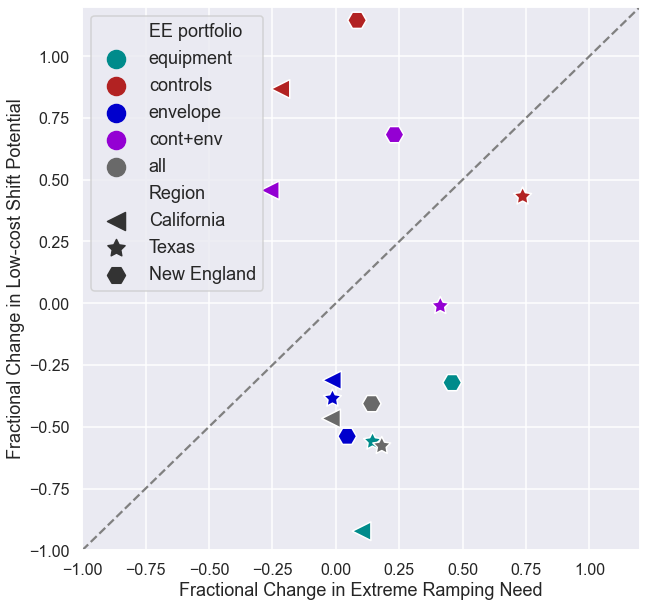

In [183]:
which_cost = 'Low-cost'
#which_cost = 'Benchmark'
#which_cost = 'High-cost'
metric_a = 'Extreme Ramping Need'
metric_b ='{c} Shift Potential'.format(c=which_cost)
fig = plot_metric_scatter(plot_data, x=metric_a, y=metric_b)


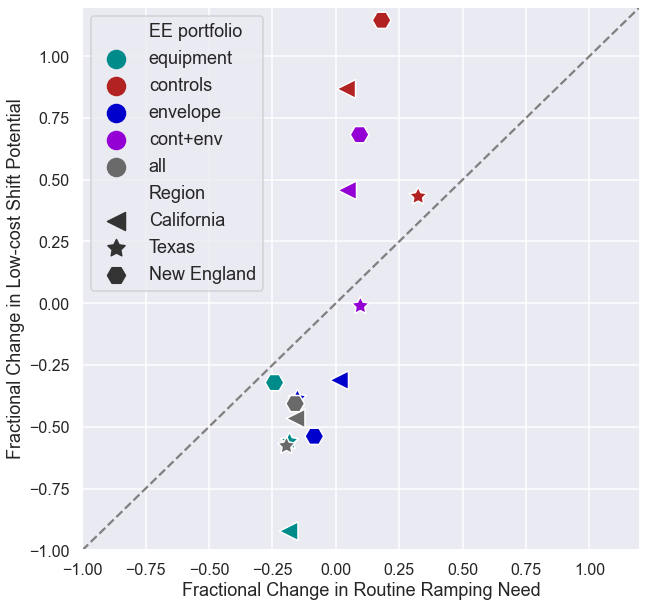

In [184]:
metric_a = 'Routine Ramping Need'
metric_b = '{c} Shift Potential'.format(c=which_cost)
fig = plot_metric_scatter(plot_data, x=metric_a, y=metric_b)

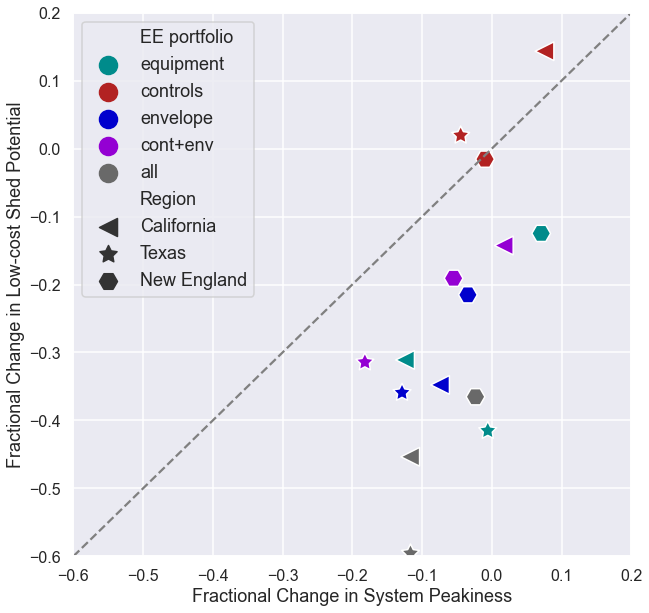

In [185]:

fig = plot_metric_scatter(plot_data, x='System Peakiness', 
                   y='{c} Shed Potential'.format(c=which_cost))


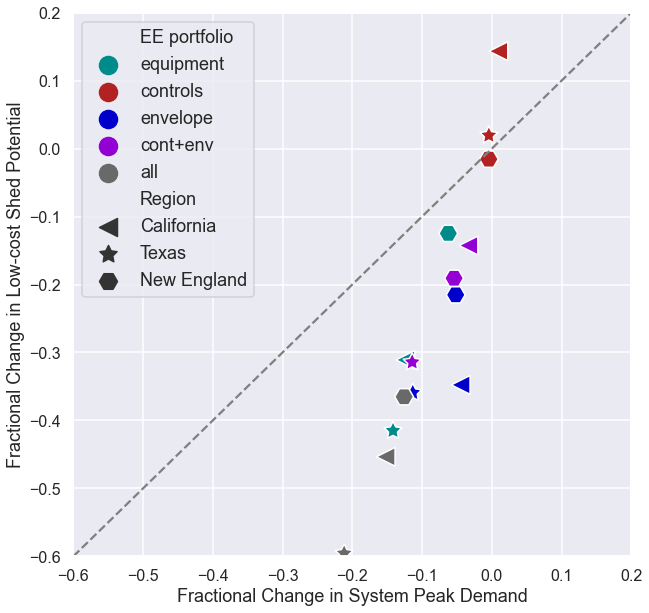

In [186]:

fig = plot_metric_scatter(plot_data, x='System Peak Demand', 
                   y='{c} Shed Potential'.format(c=which_cost))

In [212]:
def plot_metric_linear(plot_data, ax, label=None, legend='full'):
    ax.axhline(y=0, color='gray', linewidth=1.5, linestyle=":")
    ax.axhline(y=1, color='gray', linewidth=1.5, linestyle=":")
    ax.axhline(y=2, color='gray', linewidth=1.5, linestyle=":")
    ax.axvline(x=0, color='gray', linewidth=1)

    sns.scatterplot(
        data=plot_data[
            [n, 'EE portfolio', 'Region']
        ].melt(id_vars=['EE portfolio', 'Region']),
        x='value', y='Region', 
        #style='EE portfolio', 
        hue='EE portfolio', s=300,
        palette=color_mapping_scen, markers=symbol_mapping, 
        ax=ax, legend=legend)
    ax.set_xlabel('Fractional Change in Metric', fontsize=18)
    ax.set_ylabel('')
    ax.tick_params(axis='both', labelsize=18)
    ax.set_ylim(-1.,3.5)

    ax.text(0.55, 0.8, label, transform=ax.transAxes, fontsize=18)
    
    return ax
    

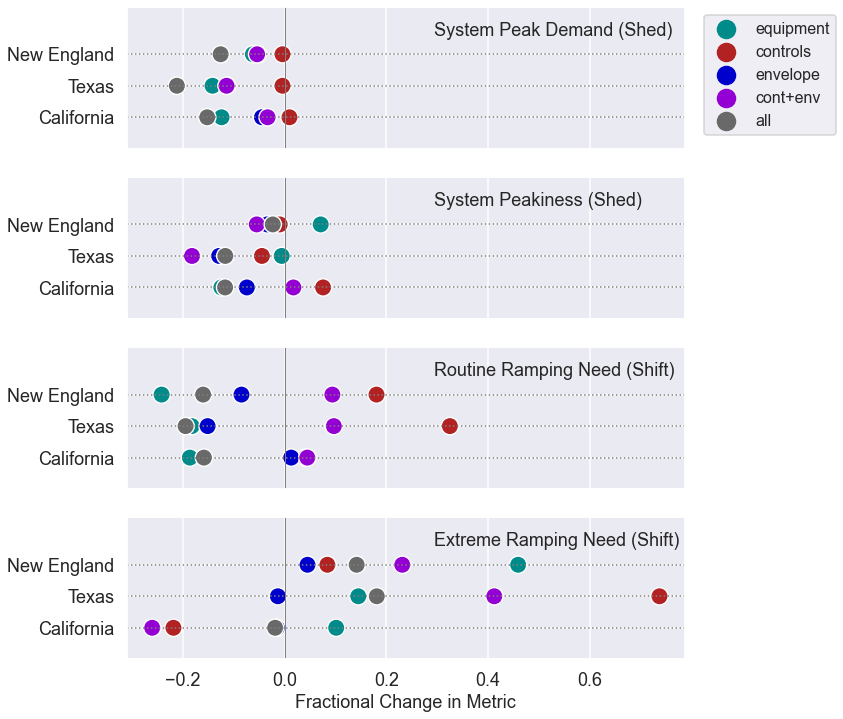

In [213]:
fig, axs = plt.subplots(4,1, figsize=[10,12], sharex=True )
for iax, n in enumerate(metric_names.keys()):
    ax=axs[iax]
    plot_metric_linear(plot_data, ax, 
                       label=n+' '+metric_names[n], legend='full' if (iax==0) else False)


handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles,labels,
                 bbox_to_anchor=[1.02,1], loc='upper left', fontsize=16, markerscale=2)

fig.savefig(os.path.join(outdir, 'Level2a_1d_shift_shed_metrics{n}.png'.format(n=noall)), 
            bbox_inches='tight')

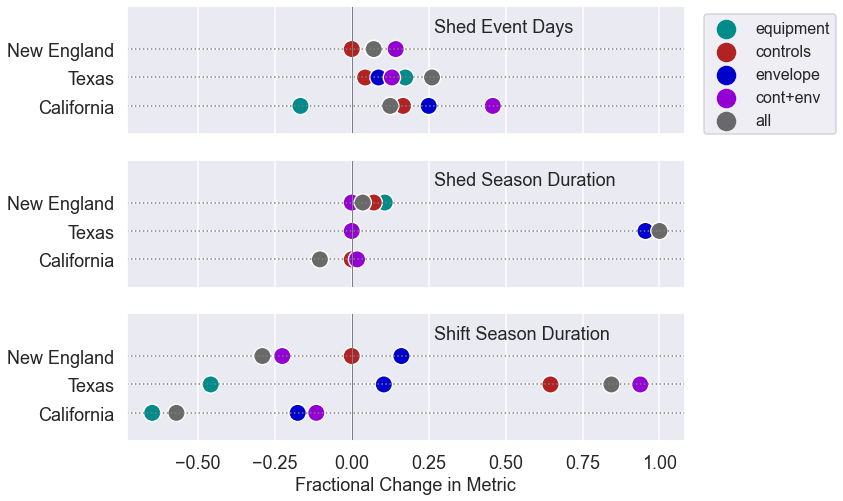

In [176]:
fig, axs = plt.subplots(3,1, figsize=[10,8], sharex=True )
for iax, n in enumerate(['Shed Event Days', 
                         'Shed Season Duration',
                         'Shift Season Duration']):
    ax=axs[iax]
    plot_metric_linear(plot_data, ax, 
                       label=n, legend='full' if (iax==0) else False)


handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles,labels,
                 bbox_to_anchor=[1.02,1], loc='upper left', fontsize=16, markerscale=2)
fig.savefig(os.path.join(outdir, 'Level2a_1d_program_design_metrics{n}.png'.format(n=noall)),
            bbox_inches='tight')

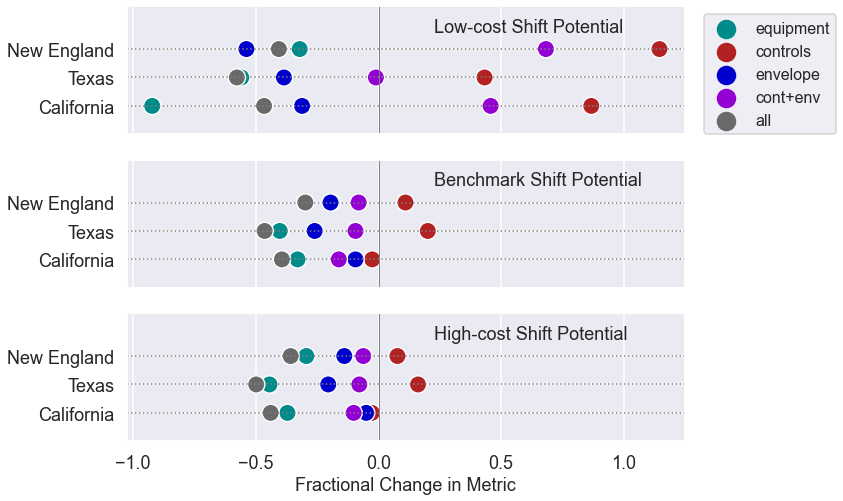

In [177]:
fig, axs = plt.subplots(3,1, figsize=[10,8], sharex=True )
for iax, n in enumerate(['Low-cost Shift Potential', 
                         'Benchmark Shift Potential',
                         'High-cost Shift Potential']):
    ax=axs[iax]
    plot_metric_linear(plot_data, ax, 
                       label=n, legend='full' if (iax==0) else False)


handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles,labels,
                 bbox_to_anchor=[1.02,1], loc='upper left', fontsize=16, markerscale=2)
fig.savefig(os.path.join(outdir, 'Level2b_1d_shift_metrics{n}.png'.format(n=noall)),
            bbox_inches='tight')

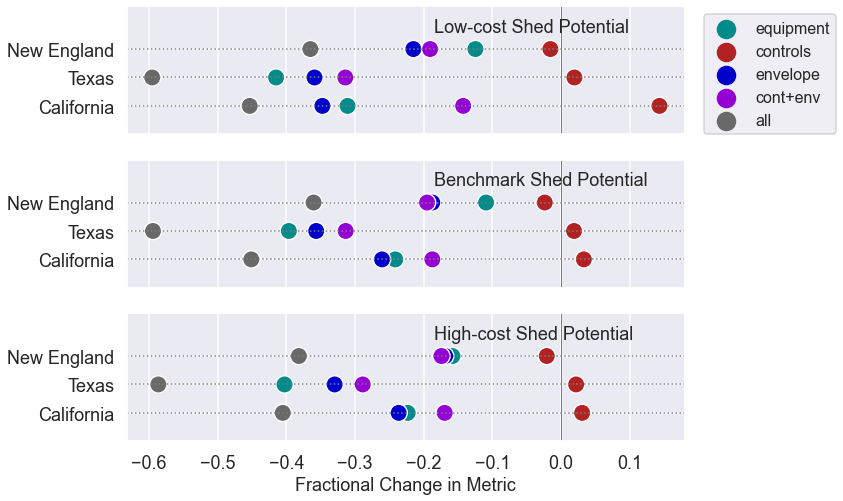

In [178]:
fig, axs = plt.subplots(3,1, figsize=[10,8], sharex=True )
for iax, n in enumerate(['Low-cost Shed Potential', 
                         'Benchmark Shed Potential',
                         'High-cost Shed Potential']):
    ax=axs[iax]
    plot_metric_linear(plot_data, ax, 
                       label=n, legend='full' if (iax==0) else False)


handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles,labels,
                 bbox_to_anchor=[1.02,1], loc='upper left', fontsize=16, markerscale=2)
fig.savefig(os.path.join(outdir, 'Level2b_1d_shed_metrics{n}.png'.format(n=noall)),
            bbox_inches='tight')